In [7]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [16]:
processeddata=pd.read_csv(r'C:\\Users\\rames\\OneDrive\\Desktop\\namma\\DA_proj\\preprocessed_wosq.csv', index_col='Id')
processeddata

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_654683e33,0.000000,0,6,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,38,4
ID_389eb5f20,0.000000,0,6,0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,4
ID_5bef9b553,24576.173137,0,3,0,1,1,0,0,2,1,...,0,0,0,0,1,0,1,0,24,2
ID_55199c2f3,24576.173137,0,3,0,1,1,0,0,2,1,...,0,0,0,0,1,0,1,0,23,2
ID_079963679,24576.173137,0,3,0,1,1,0,0,2,1,...,0,0,0,0,1,0,1,0,1,2
ID_99c9bcea5,24576.173137,0,3,0,1,1,0,0,2,1,...,0,0,0,0,1,0,1,0,3,2
ID_ca701e058,24576.173137,0,4,0,1,1,0,0,0,2,...,0,1,0,0,0,0,0,1,50,2
ID_fe8c32eba,24576.173137,0,4,0,1,1,0,0,0,2,...,0,1,0,0,0,0,0,1,16,2
ID_1e320689c,0.000000,0,5,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,59,3


In [ ]:
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column

In [24]:
class_names=processeddata.Target.unique()
a=processeddata
class_names=list(class_names)
col1=list(processeddata.columns)
#finding columns with object as datatypes and removing them for classification
data_notnum = list(a.select_dtypes(exclude=[np.number]).columns)
col1=list(filter(lambda a: a not in data_notnum , col1))
print(len(col1))
col1=list(set(col1)-set(['Target']))
print(len(col1))
X_sq = processeddata[col1] # features for dataset which includes squared parameters
y_sq = processeddata.Target #target

130
129


In [25]:
#For selecting the most appopriate columns for our model we will perform two operations.

#Random Forest for feature importance
#Eliminate highly correlated values
clf = RandomForestClassifier()
clf.fit(X_sq , y_sq)

imp = clf.feature_importances_
name = np.array(X_sq.columns.values.tolist())

df_imp = pd.DataFrame({'feature':name, 'importance':imp})
df_imp = df_imp.sort_values(by='importance', ascending=False)

C:\Users\rames\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


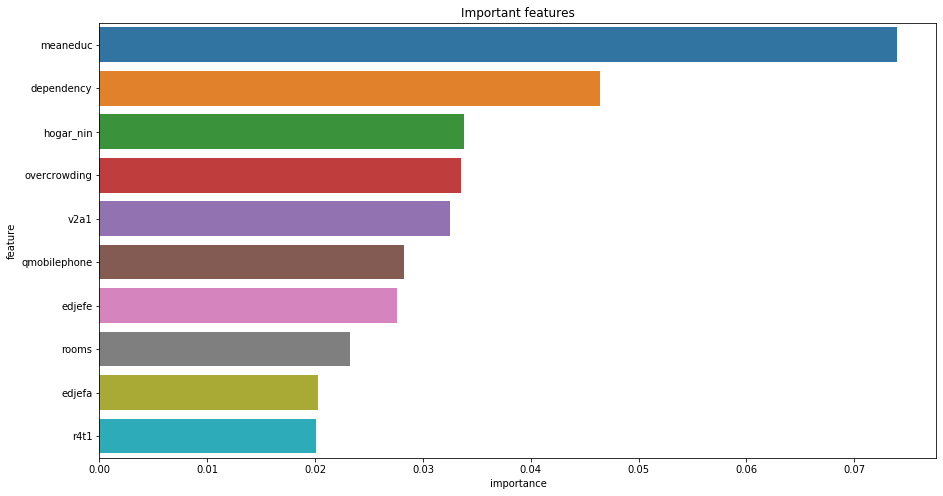

In [33]:
plt.figure(figsize=(15,8))

sns.barplot(df_imp.loc[(df_imp['importance'] > 0.02),'importance'], y = df_imp.loc[(df_imp['importance'] > 0.02),'feature'])
plt.title('Important features')
plt.show()


In [34]:
important_cols = df_imp['feature']
x_ = X_sq[important_cols]

,meaneduc,dependency,hogar_nin,overcrowding,v2a1,qmobilephone,edjefe,rooms,edjefa,r4t1,...,parentesco12,instlevel9,paredother,noelec,techootro,elimbasu6,planpri,paredfibras,pisoother,elimbasu5
Id,,,,,,,,,,,,,,,,,,,,,
ID_654683e33,16.00,1.000000,1,0.500000,0.000000,1,0,6,16,1,...,0,0,0,0,0,0,0,0,0,0
ID_389eb5f20,16.00,1.000000,1,0.500000,0.000000,1,0,6,16,1,...,0,0,0,0,0,0,0,0,0,0
ID_5bef9b553,6.50,1.000000,2,2.000000,24576.173137,2,6,3,0,2,...,0,0,0,0,0,0,0,0,0,0
ID_55199c2f3,6.50,1.000000,2,2.000000,24576.173137,2,6,3,0,2,...,0,0,0,0,0,0,0,0,0,0
ID_079963679,6.50,1.000000,2,2.000000,24576.173137,2,6,3,0,2,...,0,0,0,0,0,0,0,0,0,0
ID_99c9bcea5,6.50,1.000000,2,2.000000,24576.173137,2,6,3,0,2,...,0,0,0,0,0,0,0,0,0,0
ID_ca701e058,3.00,1.000000,1,0.666667,24576.173137,2,3,4,0,0,...,0,0,0,0,0,0,0,0,0,0
ID_fe8c32eba,3.00,1.000000,1,0.666667,24576.173137,2,3,4,0,0,...,0,0,0,0,0,0,0,0,0,0
ID_1e320689c,8.00,1.000000,1,1.000000,0.000000,2,0,5,8,0,...,0,0,0,0,0,0,0,0,0,0
